# 2階微分方程式を解く

2階以上の微分方程式を解くには，連立の1階微分方程式を解けば良い．

$$ \frac{d^2x}{dt^2} = f(x, t) $$

上の微分方程式は以下の連立微分方程式に帰着できる．

$$
\frac{dx}{dt} = v \\
\frac{dv}{dt} = f(x, t)
$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [4]:
# 前進オイラー法
def foward_euler(diff_eq, init_con, t):
    dt = (max(t)-min(t))/len(t)
    x = init_con
    x_hist = np.array([x])

    for i, nt in enumerate(t):
        if i == 0 : continue
        x = x + diff_eq(x, nt) * dt
        x_hist = np.append(x_hist, x)
    return x_hist

# ホイン法(2次のルンゲ・クッタ法)
def heun(diff_eq, init_con, t):
    dt = (max(t)-min(t))/len(t)
    x = init_con
    x_hist = np.array([x])

    for i, nt in enumerate(t):
        if i == 0 : continue
        k1 = dt * diff_eq(x, nt)
        k2 = dt * diff_eq(x+k1, nt+dt)
        x = x + (k1+k2)/2
        x_hist = np.append(x_hist, x)
    return x_hist

# 4次のルンゲ・クッタ法
def rk4(diff_eq, init_con, t):
    dt = (max(t)-min(t))/len(t)
    x = init_con
    x_hist = np.array([x])

    for i, nt in enumerate(t):
        if i == 0 : continue
        k1 = dt * diff_eq(x, nt)
        k2 = dt * diff_eq(x+k1/2, nt+dt/2)
        k3 = dt * diff_eq(x+k2/2, nt+dt/2)
        k4 = dt * diff_eq(x+k3  , nt+dt  )
        x = x + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_hist = np.append(x_hist, x)
    return x_hist

In [5]:
# 常微分方程式のクラス
class ODE(object):
    def __init__(self, diff_eq, init_con):
        self.diff_eq  = diff_eq     # 解くべき方程式(関数)
        self.init_con = init_con    # 初期条件(配列)

    def solve(self, t_min, t_max, N, solver=odeint):    # solverはデフォルトではscipyの関数だが，自作関数に変えることもできる
        t = np.linspace(t_min, t_max, N)                # 時刻tの配列の生成
        x = solver(self.diff_eq, self.init_con, t)      # 方程式の解を計算する
        return t, x

In [6]:
# 3Dplot用の関数
def plot3D(x, y, z):
    fig = plt.figure(figsize=(10,4))
    sol = fig.add_subplot(1,1,1, projection='3d')
    sol.set_xlabel("$x$", fontsize=20, fontname='serif')
    sol.set_ylabel("$y$", fontsize=20, fontname='serif')
    sol.set_zlabel("$z$", fontsize=20, fontname='serif')
    sol.tick_params(axis='both', length=10, which='major')
    sol.tick_params(axis='both', length=5,  which='minor')
    sol.minorticks_on()
    sol.plot(x, y, z, 'b')
    sol.view_init(30, 45)
    plt.show()

# plot用の関数
def plot(x, y, x_range, y_range):
    fig = plt.figure(figsize=(10,4))
    sol = fig.add_subplot(1,1,1)
    sol.set_xlabel("$t$", fontsize=20, fontname='serif')
    sol.set_ylabel("$x$", fontsize=20, fontname='serif')
    sol.tick_params(axis='both', length=10, which='major')
    sol.tick_params(axis='both', length=5,  which='minor')
    sol.set_xlim(x_range)
    sol.set_ylim(y_range)
    sol.minorticks_on()
    sol.plot(x, y, 'r')
    plt.show()

In [13]:
# 解くべき方程式
# 第1引数がスカラでなくて配列になる

def diff_eq(v, t):  # 2階微分方程式
    dxdt = v[1]     # dx/dt = v
    dvdt = -9*v[0]-v[1]+np.cos(t)    # dv/dt = f(x,t)
    return np.array([dxdt, dvdt])


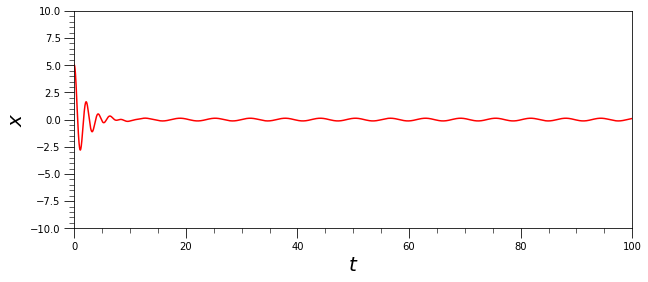

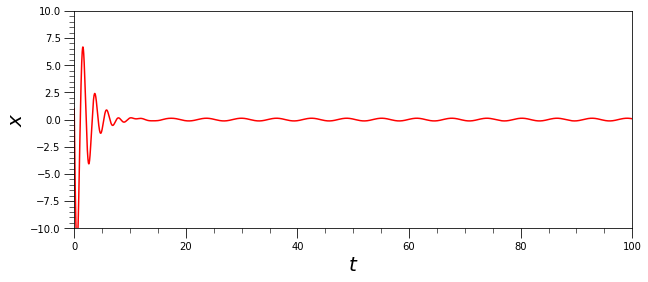

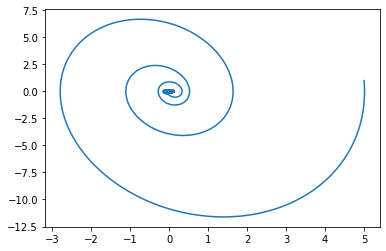

In [14]:
N = 100001                         # 分割数
min_t = 0                          # t の最小
max_t = 100                        # t の最大
initial_condition = np.array([5, 1])  # 初期条件
ode = ODE(diff_eq, initial_condition)
t, v = ode.solve(min_t, max_t, N)
plot(t, v[:,0], (min_t, max_t), (-10, 10) )
plot(t, v[:,1], (min_t, max_t), (-10, 10) )
plt.plot(v[:,0], v[:,1])